In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_pickle('BeijingRent.pkl')

In [16]:
df.set_index('id', inplace=True)
df.sort_values(by='tradeTime',ascending=True, inplace=True)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 233698 entries, BJCP86611708 to 101102321677
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Lng                      233698 non-null  float64       
 1   Lat                      233698 non-null  float64       
 2   Cid                      233698 non-null  object        
 3   tradeTime                233698 non-null  datetime64[ns]
 4   followers                233698 non-null  int64         
 5   totalPrice               233698 non-null  float64       
 6   price                    233698 non-null  int64         
 7   square                   233698 non-null  float64       
 8   livingRoom               233698 non-null  int64         
 9   drawingRoom              233698 non-null  int64         
 10  kitchen                  233698 non-null  int64         
 11  bathRoom                 233698 non-null  int64         
 12  floo

In [ ]:
# 绘制每月总销售量图
df['tradeTime_by_year_month'] = df['tradeTime'].dt.to_period('M') 

In [23]:
sales_per_month = df.groupby('tradeTime_by_year_month')['totalPrice'].sum().reset_index()
sales_per_month['year_month'] = sales_per_month['tradeTime_by_year_month'].dt.strftime('%Y-%m')

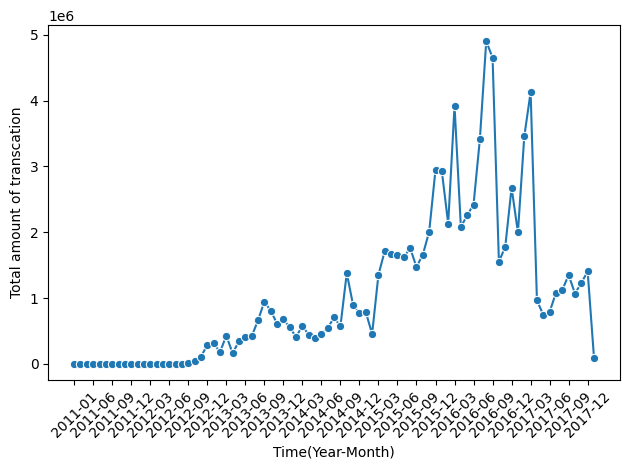

In [80]:
# plt.figure(figsize=(12,6), dpi=200)
sns.lineplot(data=sales_per_month,x='year_month', y='totalPrice', marker = 'o',markersize = 6)
plt.xlabel('Time(Year-Month)')
plt.ylabel('Total amount of transcation')
plt.xticks(sales_per_month['year_month'][::3],rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 不同行政区的销售总价
totalPriceBydistrct=df.groupby('district')['totalPrice'].sum().reset_index()

In [42]:
totalPriceBydistrct['district']=totalPriceBydistrct['district'].astype(int)
totalPriceBydistrct.sort_values(by=['district'],ascending=True, inplace=True)

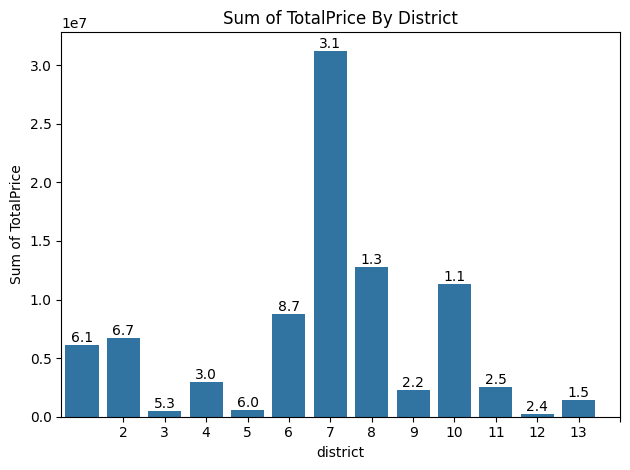

In [79]:
# plt.figure(figsize=(6,4), dpi=200)
bars=sns.barplot(data=totalPriceBydistrct,x='district',y='totalPrice')
for bar in bars.patches:
    height = bar.get_height()
    effective_value = f'{height:.1e}'.split('e')[0]
    bars.annotate(effective_value,
                  (bar.get_x() + bar.get_width()/2, height),
                  ha='center', va = 'bottom')
plt.xlabel('district',loc='center')
plt.xticks(ticks=totalPriceBydistrct['district'])
plt.ylabel('Sum of TotalPrice')
plt.title('Sum of TotalPrice By District')
plt.tight_layout()
plt.show()